<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/lsb_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

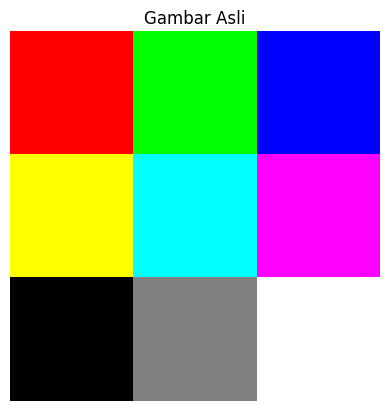

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def display_image(image, title="Gambar"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hilangkan sumbu
    plt.show()

# Contoh penggunaan
# Buat gambar 3x3 dengan warna putih
image = Image.new('RGB', (3, 3), color=(255, 255, 255))

# Define RGB values for each pixel (3x3 grid)
pixels = [
    (255, 0, 0), (0, 255, 0), (0, 0, 255),   # Red, Green, Blue
    (255, 255, 0), (0, 255, 255), (255, 0, 255), # Yellow, Cyan, Magenta
    (0, 0, 0), (128, 128, 128), (255, 255, 255) # Black, Gray, White
]

# Update the image with these pixel values
image.putdata(pixels)

display_image(image, "Gambar Asli")

In [9]:
# Fungsi untuk menampilkan RGB dan nilai biner setiap piksel
def display_pixel_values(image):
    # Dapatkan data piksel dari gambar
    pixels = list(image.getdata())

    print("RGB dan Nilai Biner untuk setiap piksel:")
    for i, pixel in enumerate(pixels):
        # Pisahkan nilai R, G, B
        r, g, b = pixel

        # Konversi nilai R, G, B ke biner
        r_bin = f'{r:08b}'
        g_bin = f'{g:08b}'
        b_bin = f'{b:08b}'

        print(f"Piksel {i+1}: RGB ({r}, {g}, {b}) - Biner (R: {r_bin}, G: {g_bin}, B: {b_bin})")

display_pixel_values(image)

RGB dan Nilai Biner untuk setiap piksel:
Piksel 1: RGB (255, 0, 0) - Biner (R: 11111111, G: 00000000, B: 00000000)
Piksel 2: RGB (0, 255, 0) - Biner (R: 00000000, G: 11111111, B: 00000000)
Piksel 3: RGB (0, 0, 255) - Biner (R: 00000000, G: 00000000, B: 11111111)
Piksel 4: RGB (255, 255, 0) - Biner (R: 11111111, G: 11111111, B: 00000000)
Piksel 5: RGB (0, 255, 255) - Biner (R: 00000000, G: 11111111, B: 11111111)
Piksel 6: RGB (255, 0, 255) - Biner (R: 11111111, G: 00000000, B: 11111111)
Piksel 7: RGB (0, 0, 0) - Biner (R: 00000000, G: 00000000, B: 00000000)
Piksel 8: RGB (128, 128, 128) - Biner (R: 10000000, G: 10000000, B: 10000000)
Piksel 9: RGB (255, 255, 255) - Biner (R: 11111111, G: 11111111, B: 11111111)


In [18]:
def get_lsb_from_num(value):
    lsb = value & 1
    return lsb

def get_lsb_from_bits(bit_str):
    return int(bit_str[-1])

def num_to_bit(num):
    return bin(num)[2:]

char = "A"
value = ord(char)
bit = num_to_bit(value)
lsb1 = get_lsb_from_num(value)
lsb2 = get_lsb_from_bits(bit)
print(lsb1 == lsb2)
print(f"Char: {char} (ASCII: {value}) (binary: {bit}) (LSB: {lsb1})")

True
Char: A (ASCII: 65) (binary: 1000001) (LSB: 1)


In [41]:
def change_lsb(value, new_lsb):
    if new_lsb not in [0, 1, '0', '1']:
        raise ValueError("new_lsb must be either 0 or 1.")

    new_lsb = int(new_lsb)

    # Clear the current LSB using bitwise AND with ~1 (which is -2 in binary)
    value = value & ~1

    # Set the new LSB using bitwise OR if new_lsb is 1
    value = value | new_lsb

    return value

# Other functions (unchanged)
def get_lsb_from_num(value):
    lsb = value & 1
    return lsb

def get_lsb_from_bits(bit_str):
    return int(bit_str[-1])

def num_to_bit(num):
    return bin(num)[2:]

def num_to_binary(num):
    return bin(num)[2:].zfill(8)

# Example usage
char = "A"
value = ord(char)
bit = num_to_bit(value)
lsb1 = get_lsb_from_num(value)
lsb2 = get_lsb_from_bits(bit)

# Changing the LSB to 1
new_value = change_lsb(value, 1)
new_bit = num_to_bit(new_value)
new_lsb = get_lsb_from_num(new_value)

print(f"Original char: {char} (ASCII: {value}) (binary: {bit}) (LSB: {lsb1})")
print(f"Modified value: {new_value} (binary: {new_bit}) (New LSB: {new_lsb})")

# Changing the LSB back to 0
new_value_0 = change_lsb(value, 0)
new_bit_0 = num_to_bit(new_value_0)
new_lsb_0 = get_lsb_from_num(new_value_0)

print(f"Modified value (LSB 0): {chr(new_value_0)} (ASCII: {new_value_0}) (binary: {new_bit_0}) (New LSB: {new_lsb_0})")

Original char: A (ASCII: 65) (binary: 1000001) (LSB: 1)
Modified value: 65 (binary: 1000001) (New LSB: 1)
Modified value (LSB 0): @ (ASCII: 64) (binary: 1000000) (New LSB: 0)


In [23]:
bit

'1000001'

In [83]:
def embbed(image, message):
    pixels = list(image.getdata())
    new_pixels = []

    message_bits = ''.join(num_to_binary(ord(char)) for char in message)
    print(message_bits)
    message_bits_len = len(message_bits)
    length_bits = num_to_binary(message_bits_len)

    message_bits = length_bits + message_bits

    msg_idx = 0
    for i, pixel in enumerate(pixels):
      new_pixel = []
      for j in pixel:
        if msg_idx < len(message_bits):
            old_lsb = j

            new_lsb = change_lsb(j, message_bits[msg_idx])

            j = new_lsb

            new_pixel.append(new_lsb)

            msg_idx += 1
            binary = num_to_binary(j)

        else:
          new_pixel.append(j)

        print(f'binary: {binary}; hex: {j}; value before: {old_lsb}; value after: {new_lsb}')

      new_pixels.append(tuple(new_pixel))

    new_image = Image.new(image.mode, image.size)
    new_image.putdata(new_pixels)

    return new_image

new_image = embbed(image, 'A')

01000001
binary: 11111110; hex: 254; value before: 255; value after: 254
binary: 00000000; hex: 0; value before: 0; value after: 0
binary: 00000000; hex: 0; value before: 0; value after: 0
binary: 00000000; hex: 0; value before: 0; value after: 0
binary: 11111111; hex: 255; value before: 255; value after: 255
binary: 00000000; hex: 0; value before: 0; value after: 0
binary: 00000000; hex: 0; value before: 0; value after: 0
binary: 00000000; hex: 0; value before: 0; value after: 0
binary: 11111110; hex: 254; value before: 255; value after: 254
binary: 11111111; hex: 255; value before: 255; value after: 255
binary: 11111110; hex: 254; value before: 255; value after: 254
binary: 00000000; hex: 0; value before: 0; value after: 0
binary: 00000000; hex: 0; value before: 0; value after: 0
binary: 11111110; hex: 254; value before: 255; value after: 254
binary: 11111110; hex: 254; value before: 255; value after: 254
binary: 11111111; hex: 255; value before: 255; value after: 255
binary: 1111111

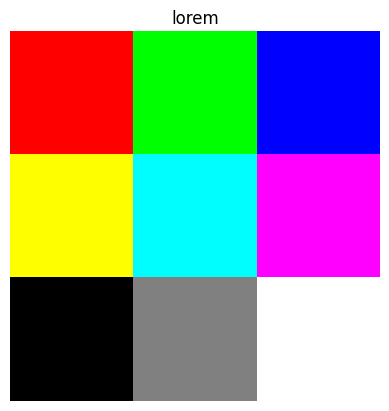

In [84]:
display_image(new_image, "lorem")

In [85]:
display_pixel_values(new_image)

RGB dan Nilai Biner untuk setiap piksel:
Piksel 1: RGB (254, 0, 0) - Biner (R: 11111110, G: 00000000, B: 00000000)
Piksel 2: RGB (0, 255, 0) - Biner (R: 00000000, G: 11111111, B: 00000000)
Piksel 3: RGB (0, 0, 254) - Biner (R: 00000000, G: 00000000, B: 11111110)
Piksel 4: RGB (255, 254, 0) - Biner (R: 11111111, G: 11111110, B: 00000000)
Piksel 5: RGB (0, 254, 254) - Biner (R: 00000000, G: 11111110, B: 11111110)
Piksel 6: RGB (255, 0, 255) - Biner (R: 11111111, G: 00000000, B: 11111111)
Piksel 7: RGB (0, 0, 0) - Biner (R: 00000000, G: 00000000, B: 00000000)
Piksel 8: RGB (128, 128, 128) - Biner (R: 10000000, G: 10000000, B: 10000000)
Piksel 9: RGB (255, 255, 255) - Biner (R: 11111111, G: 11111111, B: 11111111)


In [86]:
def extract(image):
    pixels = list(image.getdata())

    length_bits = []
    msg_idx = 0

    for i, pixel in enumerate(pixels):
        for j in pixel:
            if msg_idx < 8:  # Only need 8 bits for the length
                length_bits.append(str(get_lsb_from_num(j)))
                msg_idx += 1
            else:
                break
        if msg_idx >= 8:
            break

    # Convert the length bits to an integer
    length_bin_str = ''.join(length_bits)
    message_len = int(length_bin_str, 2)
    print(f"Extracted message length (in bits): {message_len}")

    # Now extract the actual message based on the extracted length
    message_bits = []
    msg_idx = 0  # Reset message index

    for i, pixel in enumerate(pixels):
        if i == 0:  # Skip the first pixel since it contains the length
            continue

        for j in pixel:
            if msg_idx < message_len:
                message_bits.append(str(get_lsb_from_num(j)))
                msg_idx += 1
            if msg_idx >= message_len:
                break
        if msg_idx >= message_len:
            break

    print(message_bits)

    # Group the message bits into 8-bit chunks and convert to characters
    extracted_message = ''
    for i in range(0, len(message_bits), 8):
        byte = ''.join(message_bits[i:i+8])
        extracted_message += chr(int(byte, 2))

    return extracted_message

extracted_message = extract(new_image)
print(f"Extracted message: {extracted_message}")

Extracted message length (in bits): 8
['0', '1', '0', '0', '0', '0', '1', '0']
Extracted message: B
